In [1]:
# Stephen.Griffies@noaa.gov 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob 
import mplsettings

import cartopy.crs as ccrs

%matplotlib inline

In [3]:
dirstix = "../../common/static_ttf"
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [4]:
# static file 

fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
static       = xr.open_mfdataset(fname_static)
areacello    = static['areacello']
area         = areacello*static['wet']

In [5]:
ds_ke_zave = xr.open_mfdataset('CM4Xp125_ke_zave.nc')
ke_zave    = ds_ke_zave['ke_zave']

In [6]:
ds_ke_ratio = xr.open_mfdataset('CM4Xp125_ke_ratio_bar_total.nc')
ke_ratio_bar_total = ds_ke_ratio['ke_ratio_bar_total']

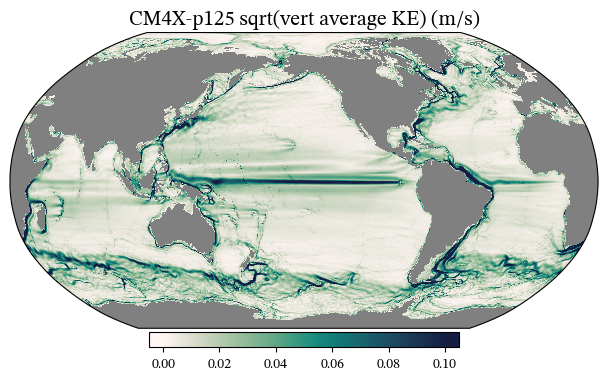

In [7]:
field = np.sqrt(ke_zave)
vmin=0
vmax=.1

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
                     vmin=vmin, vmax=vmax,
#                     levels=levels,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False
                    )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 sqrt(vert average KE) (m/s)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')
#axis.text(.20,.01, 'For years 1981-2010',fontsize=20, transform=axis.transAxes)
                     
plt.tight_layout()
plt.show()
fig.savefig('Fig05_CM4Xp125_sqrt_ke_zave.jpg', format='jpeg', bbox_inches='tight', dpi=400)

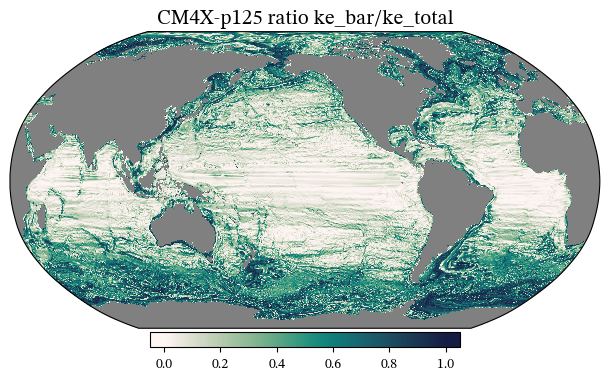

In [8]:
field = ke_ratio_bar_total
vmin=0
vmax=1

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
                     vmin=vmin, vmax=vmax,
#                     levels=levels,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False
                    )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 ratio ke_bar/ke_total', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')
#axis.text(.20,.01, 'For years 1981-2010',fontsize=20, transform=axis.transAxes)
                     
plt.tight_layout()
plt.show()
fig.savefig('Fig05_CM4Xp125_ke_bar_ke_tot.jpg', bbox_inches='tight', format='jpeg', dpi=400)